In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
models = pd.read_pickle("models-df.pkl")
models.head(5)

,area,problem,model,version,size,path,ops
0,text,machine_comprehension,bert-squad,bertsquad-10.onnx,435852734,C:\ONNX\models\text\machine_comprehension\bert...,"{Shape, Concat, Transpose, Pow, MatMul, Slice,..."
1,text,machine_comprehension,bert-squad,bertsquad-12-int8.onnx,124565601,C:\ONNX\models\text\machine_comprehension\bert...,"{Shape, Concat, FusedMatMul, Transpose, Pow, M..."
2,text,machine_comprehension,bert-squad,bertsquad-12.onnx,435852736,C:\ONNX\models\text\machine_comprehension\bert...,"{Shape, Concat, Transpose, Pow, MatMul, Slice,..."
3,text,machine_comprehension,bert-squad,bertsquad-8.onnx,435882893,C:\ONNX\models\text\machine_comprehension\bert...,"{Shape, Concat, Transpose, Pow, MatMul, Slice,..."
4,text,machine_comprehension,bidirectional_attention_flow,bidaf-9.onnx,43522228,C:\ONNX\models\text\machine_comprehension\bidi...,"{Sigmoid, Abs, Shape, Concat, Conv, ReduceSum,..."


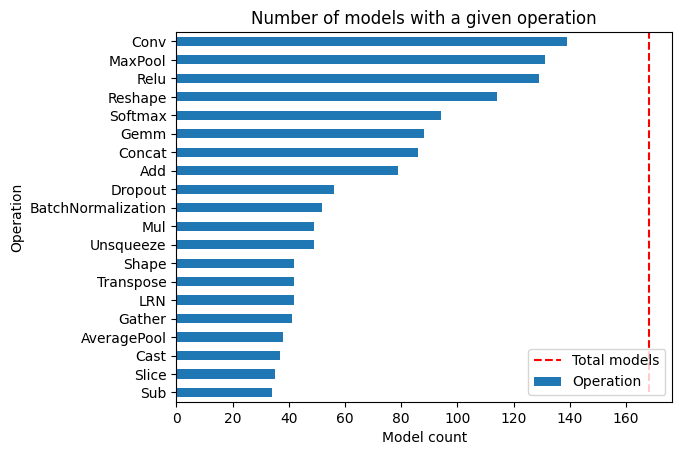

In [3]:
model_ops = [list(ops) for ops in models["ops"].values.tolist()]

pd.Series(sum(model_ops, [])).value_counts(ascending=True).tail(20).plot.barh(label="Operation")
plt.title("Number of models with a given operation")
plt.xlabel("Model count");
plt.ylabel("Operation")
plt.vlines(len(models), 0, 20, colors="red", linestyles="dashed", label="Total models")
plt.legend();

In [4]:
implemented = set([
    "Add",
    "BatchNormalization",
    "Concat",
    "Constant",
    "Conv",
    "Div",
    "Dropout",
    "Gemm",
    "MatMul",
    "MaxPool",
    "Mul",
    "Relu",
    "Reshape",
    "Softmax",
    "Sub",
    "Sum",
    "Transpose",
])

models["missing_ops"] = models["ops"].apply(lambda ops: ops - implemented)
models["missing_ops_len"] = models["missing_ops"].apply(lambda mops: len(mops))

In [5]:
print("Total models:", len(models))
print("Runnable models with implemented ops:", len(models[models["missing_ops_len"] == 0]))
models.sort_values(["missing_ops_len", "size"]).head(50)

Total models: 168
Runnable models with implemented ops: 18


,area,problem,model,version,size,path,ops,missing_ops,missing_ops_len
67,vision,classification,mnist,mnist-12.onnx,26143,C:\ONNX\models\vision\classification\mnist\mod...,"{MaxPool, Relu, Add, Conv, Reshape, MatMul}",{},0
68,vision,classification,mnist,mnist-7.onnx,26454,C:\ONNX\models\vision\classification\mnist\mod...,"{MaxPool, Relu, Add, Conv, Reshape, MatMul}",{},0
69,vision,classification,mnist,mnist-8.onnx,26454,C:\ONNX\models\vision\classification\mnist\mod...,"{MaxPool, Relu, Add, Conv, Reshape, MatMul}",{},0
65,vision,classification,mnist,mnist-1.onnx,27266,C:\ONNX\models\vision\classification\mnist\mod...,"{MaxPool, Relu, Div, Add, Conv, Reshape, MatMu...",{},0
167,vision,super_resolution,sub_pixel_cnn_2016,super-resolution-10.onnx,240078,C:\ONNX\models\vision\super_resolution\sub_pix...,"{Transpose, Relu, Conv, Reshape, Constant}",{},0
19,vision,body_analysis,emotion_ferplus,emotion-ferplus-7.onnx,35040571,C:\ONNX\models\vision\body_analysis\emotion_fe...,"{MaxPool, Relu, Div, Add, Conv, Reshape, MatMu...",{},0
20,vision,body_analysis,emotion_ferplus,emotion-ferplus-8.onnx,35040571,C:\ONNX\models\vision\body_analysis\emotion_fe...,"{MaxPool, Relu, Div, Add, Conv, Reshape, MatMu...",{},0
18,vision,body_analysis,emotion_ferplus,emotion-ferplus-2.onnx,35041945,C:\ONNX\models\vision\body_analysis\emotion_fe...,"{MaxPool, Relu, Div, Add, Conv, Reshape, MatMu...",{},0
130,vision,object_detection_segmentation,duc,ResNet101-DUC-12.onnx,260671144,C:\ONNX\models\vision\object_detection_segment...,"{MaxPool, Relu, Reshape, Conv, Softmax, BatchN...",{},0
131,vision,object_detection_segmentation,duc,ResNet101-DUC-7.onnx,260681709,C:\ONNX\models\vision\object_detection_segment...,"{MaxPool, Relu, Reshape, Conv, Softmax, BatchN...",{},0


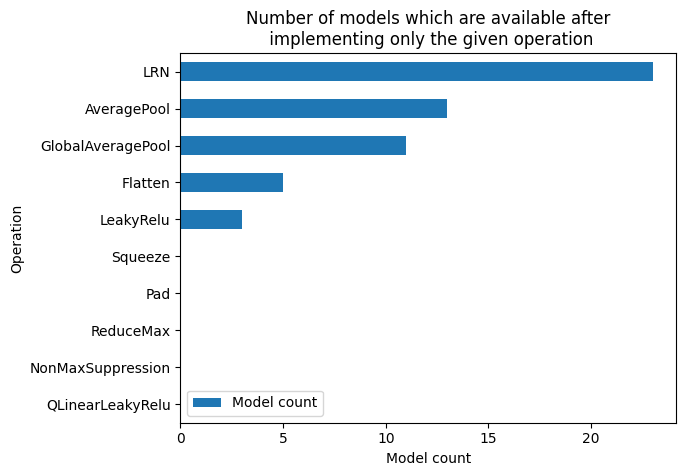

In [6]:
# Which op to consider next?

available_ops = set(sum(model_ops, [])) - implemented
y = []

for op in available_ops:
    y.append(models["missing_ops"].apply(lambda mops: mops == { op }).sum())

pd.Series(y, index=available_ops).sort_values().tail(10).plot.barh(label="Model count")
plt.title("Number of models which are available after\n implementing only the given operation")
plt.xlabel("Model count");
plt.ylabel("Operation")
plt.legend();